# DATA MINING PROJECT

## PHASE-1 PRE-PROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import string
import re
from spellchecker import SpellChecker
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
from collections import Counter

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ananth/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/ananth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/ananth/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ananth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ananth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#pip install wordcloud
!pip install pyspellchecker

In [3]:
df_train = pd.read_csv('../data/train.csv')

In [4]:
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [5]:
df_train.shape

(3911, 8)

### A. DATA CLEANING

In [6]:
#Missing Value check
df_train.isna().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

In [7]:
#Reading a few samples of essay
target_features = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

def read_text(df):
    sample = df.sample(1)
    text = sample['full_text'].values[0]
    scores = sample[target_features].values.tolist()[0]
    return text,scores

for _ in range(2):
    print(f"\n\n{'=='*20}\n\n")
    text,scores = read_text(df_train)
    for i,score in enumerate(target_features):
        print(f"{score}: {scores[i]}")
    print(f"total: {sum(scores)}")
    print(f'\n{"--"*20}\n')
    print(text)





cohesion: 2.5
syntax: 2.5
vocabulary: 2.5
phraseology: 3.0
grammar: 2.0
conventions: 2.0
total: 14.5

----------------------------------------

I think the best way is to work as a group. You might ask why. is the best way students get to learn, For example; I'm the type of student that like to hear about peoples opinion. By listining to other people opinin give the other student a idea on how the project or the assigment should be done. When student get the chance to express they idea they feel confident no fear to express themselve.

Many students like to work bby themselve, therefore no other student interrupt the by asking to many question. Most of them already have a topic to talk about they already have a plan. For Example student that work alone they mostly working at their own pace, working alone give then the chance of finishing on time.

Working as a group give the student the chance of dividing the work in different sections, For example; this student would do this part,

In [8]:
df_train.describe(include='object')

,text_id,full_text
count,3911,3911
unique,3911,3911
top,0016926B079C,I think that students would benefit from learn...
freq,1,1


In [9]:
df_train.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
def text_cleaning(text):  
    
    # tokenizing text 
    tokens = word_tokenize(text)
    
    # converting list to string
    text = ' '.join(tokens)
    
    # convert text to lowercase and remove leading/trailing white space
    text = ''.join(text.lower().strip()) 
    
    # remove newlines, tabs, and extra white spaces
    text = re.sub('\n|\r|\t', ' ', text)
    text = re.sub(' +', ' ', text)
    text = ''.join(text.lower().strip()) 

    # remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    cleaned_text = ' '.join([word for word in text.split() if word not in stop_words])
    cleaned_text = ''.join([char for char in cleaned_text if char not in string.punctuation])
    cleaned_text = ' '.join([char for char in cleaned_text.split() if len(char) > 2]) # Added this for only keeping words with lengths>2
    
    cleaned_tokens = cleaned_text.split()
    
    return cleaned_tokens

# apply the text_cleaning function to the 'full_text' column using apply() method
df_train['cleaned_tokenize_text'] = df_train['full_text'].apply(text_cleaning)
df_train['cleaned_tokenize_text'][2]

['dear',
 'principal',
 'change',
 'school',
 'policy',
 'grade',
 'average',
 'unfair',
 'many',
 'students',
 'average',
 'means',
 'cant',
 'sports',
 'activities',
 'want',
 'bad',
 'like',
 'taking',
 'everything',
 'kids',
 'want',
 'become',
 'good',
 'something',
 'cant',
 'school',
 'policy',
 'average',
 'still',
 'able',
 'sports',
 'activities',
 'average',
 'bad',
 'higher',
 'average',
 'school',
 'police',
 'average',
 'lower',
 'sports',
 'activities',
 'average',
 'school',
 'working',
 'hard',
 'means',
 'going',
 'try',
 'hard',
 'average',
 'trying',
 'hard',
 'able',
 'sports',
 'activities',
 'good',
 'people',
 'sports',
 'average',
 'school',
 'means',
 'cant',
 'play',
 'going',
 'lose',
 'every',
 'game',
 'good',
 'policy',
 'get',
 'grade',
 'take',
 'away',
 'something',
 'care',
 'everyone',
 'able',
 'sports',
 'want',
 'school',
 'policy',
 'happens',
 'schools',
 'going',
 'boarding',
 'students',
 'cant',
 'sports',
 'activities',
 'students',
 'good',

In [11]:
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"[think, students, would, benefit, learning, ho..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"[problem, change, let, best, matter, happening..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"[dear, principal, change, school, policy, grad..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"[best, time, life, become, agree, greatest, ac..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"[small, act, kindness, impact, people, change,..."


In [12]:
# initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# define a function to apply lemmatization with POS tagging to each word
def lemmatize_with_pos(word):
    pos = get_wordnet_pos(word)
    if pos:
        return lemmatizer.lemmatize(word, pos=pos)
    else:
        return lemmatizer.lemmatize(word)

# define a function to get the appropriate POS tag for a word
def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # default to noun if not found

# define a function to apply lemmatization to each word
def lemmatize_text(text):
    return [lemmatize_with_pos(word) for word in text]

# apply the function to the 'clean_text' column using apply() method
df_train['lemmatized_text'] = df_train['cleaned_tokenize_text'].apply(lambda x: lemmatize_text(x))

df_train['lemmatized_text'][0]

['think',
 'student',
 'would',
 'benefit',
 'learn',
 'home',
 'wont',
 'change',
 'get',
 'early',
 'morning',
 'shower',
 'hair',
 'take',
 'class',
 'help',
 'house',
 'pay',
 'attention',
 'comfortable',
 'home',
 'hardest',
 'part',
 'school',
 'get',
 'ready',
 'wake',
 'brush',
 'teeth',
 'closet',
 'look',
 'cloth',
 'think',
 'picked',
 'outfit',
 'look',
 'mirror',
 'youll',
 'either',
 'like',
 'look',
 'see',
 'stain',
 'change',
 'online',
 'class',
 'wear',
 'anything',
 'stay',
 'home',
 'wont',
 'need',
 'stress',
 'wear',
 'student',
 'usually',
 'take',
 'shower',
 'school',
 'either',
 'take',
 'sleep',
 'wake',
 'student',
 'smell',
 'good',
 'cause',
 'miss',
 'bus',
 'effect',
 'lesson',
 'time',
 'cause',
 'come',
 'late',
 'school',
 'online',
 'class',
 'wont',
 'need',
 'miss',
 'lesson',
 'cause',
 'get',
 'everything',
 'set',
 'take',
 'shower',
 'get',
 'ready',
 'home',
 'comfortable',
 'pay',
 'attention',
 'give',
 'advantage',
 'smarter',
 'even',
 'p

In [13]:
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,lemmatized_text
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"[think, students, would, benefit, learning, ho...","[think, student, would, benefit, learn, home, ..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"[problem, change, let, best, matter, happening...","[problem, change, let, best, matter, happen, c..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"[dear, principal, change, school, policy, grad...","[dear, principal, change, school, policy, grad..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"[best, time, life, become, agree, greatest, ac...","[best, time, life, become, agree, great, accom..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"[small, act, kindness, impact, people, change,...","[small, act, kindness, impact, people, change,..."


In [14]:
df_train.to_csv('processed_essays.csv', sep=',', index=False)

### B. EXPLORATORY DATA ANALYSIS

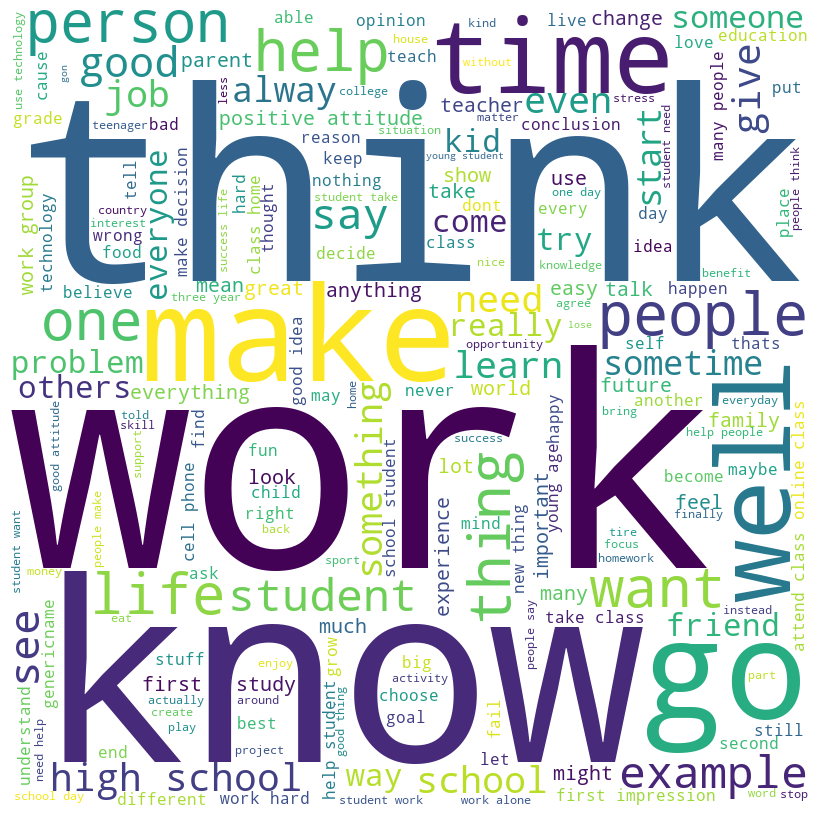

In [15]:
# Convert the list of tokenized words to a string for each row in the column
text = df_train['lemmatized_text'].apply(lambda x: ' '.join(x))

# Join the strings
words = ' '.join(text.tolist())

# Create a wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(words)

sns.set_style('darkgrid')

# Plot the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In order to understand the distribution of frequently used words in the cleaned tokens, I have used WordCloud to visualize the same. We can see some words like work, go, people, time, know, life and many others which derive our attention.

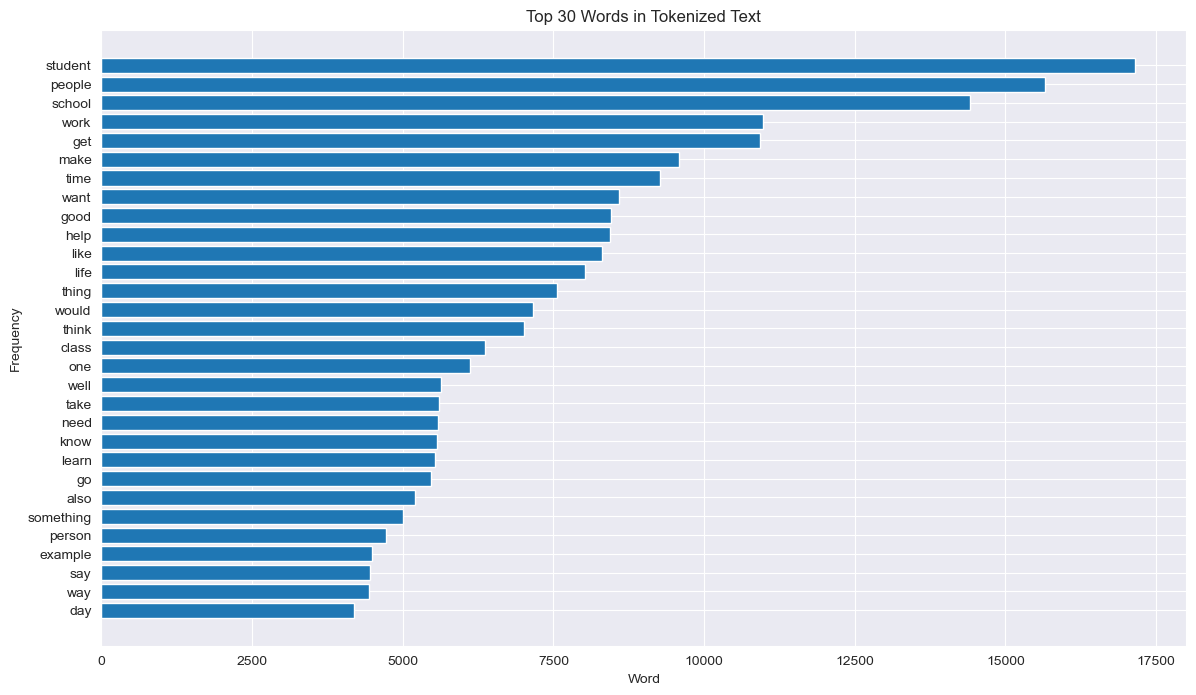

In [16]:
# Flatten the list of tokenized words
words = [word for sentence in df_train['lemmatized_text'] for word in sentence]

# Count the frequency of each word
word_freq = Counter(words)

# Print the 30 most common words and their frequencies
word_list = word_freq.most_common(30)

# Sort the word list in descending order of frequency
word_list = sorted(word_list, key=lambda x: x[1], reverse=False)

# Set the figure size
plt.figure(figsize=(14, 8))
sns.set_style('darkgrid')

# Create a bar chart of the word frequencies
plt.barh([word[0] for word in word_list], [word[1] for word in word_list])

# Set the chart title and axis labels
plt.title('Top 30 Words in Tokenized Text')
plt.xlabel('Word')
plt.ylabel('Frequency')

# Show the chart
plt.show()

If we have a look at top 30 words, we could see that there are words with characters less than than equal to 2. We may remove them to get more concrete collection of words. 

Let's understand how the essays are distributed in terms of total length, sentences and words.

mean essay length: 2335
min essay length: 82
max essay length: 6044


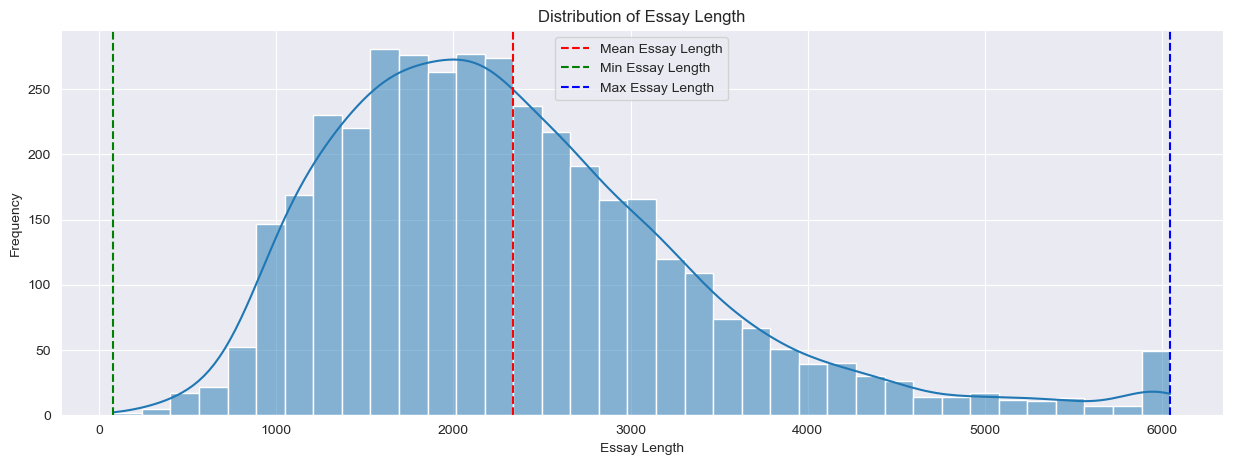

In [17]:
# Compute the length of each essay
essay_lengths = df_train['full_text'].apply(len)

# Compute the statistics
mean_length = essay_lengths.mean()
print('mean essay length:', round(mean_length))

min_length = essay_lengths.min()
print('min essay length:', round(min_length))

max_length = essay_lengths.max()
print('max essay length:', round(max_length))

# Set the figure size and style
plt.figure(figsize=(15, 5))
sns.set_style('darkgrid')

# Plot the distribution of essay lengths
sns.histplot(data=essay_lengths, kde=True)

# Add a vertical line for the mean essay length
plt.axvline(x=mean_length, color='red', linestyle='--', label='Mean Essay Length')

# Add a vertical line for the minimum essay length
plt.axvline(x=min_length, color='green', linestyle='--', label='Min Essay Length')

# Add a vertical line for the minimum essay length
plt.axvline(x=max_length, color='blue', linestyle='--', label='Max Essay Length')

# Set the title and labels
plt.title("Distribution of Essay Length")
plt.xlabel("Essay Length")
plt.ylabel("Frequency")

# Add a legend
plt.legend()

# Show the plot
plt.show()


Average Number of Sentences in an Essay: 18
Min Number of Sentences in an Essay: 1
Max Number of Sentences in an Essay: 99


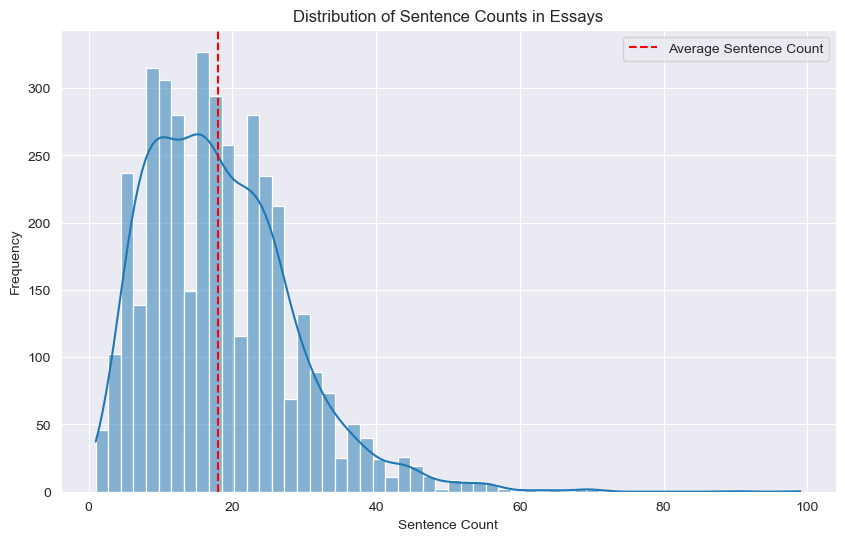

In [18]:
# Compute the statistics
df_train['sent_count'] = df_train['full_text'].apply(lambda x: len(sent_tokenize(x)))
avg_sent = round(df_train['sent_count'].mean())
print('Average Number of Sentences in an Essay: {}'.format(avg_sent))

min_sent = round(df_train['sent_count'].min())
print('Min Number of Sentences in an Essay: {}'.format(min_sent))

max_sent = round(df_train['sent_count'].max())
print('Max Number of Sentences in an Essay: {}'.format(max_sent))

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')

# Plot the distribution of sentence counts
title = 'Distribution of Sentence Counts in Essays'
sns.histplot(df_train['sent_count'], kde=True)
plt.axvline(x=avg_sent, color='red', linestyle='--', label='Average Sentence Count')
plt.legend()
plt.title(title)
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Average Sentence Length: 30
Min Sentence Length: 6
Max Sentence Length: 578


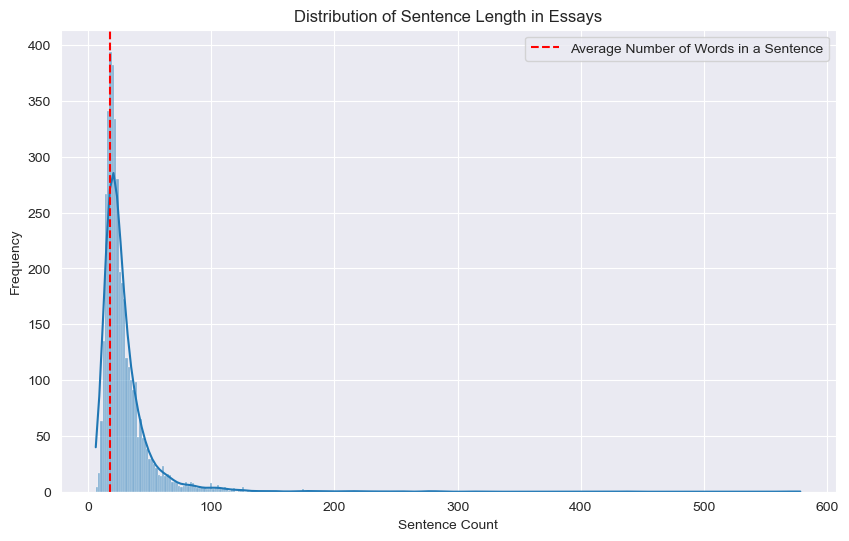

In [19]:
# Compute the average number of words in a sentence in an essay
df_train['sent_len'] = df_train['full_text'].apply(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))
avg_sent_len = round(np.mean(df_train['sent_len']))
print('Average Sentence Length: {}'.format(avg_sent_len))

min_sent_len = round(np.min(df_train['sent_len']))
print('Min Sentence Length: {}'.format(min_sent_len))

max_sent_len = round(np.max(df_train['sent_len']))
print('Max Sentence Length: {}'.format(max_sent_len))

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')

# Plot the distribution of sentence length
title = 'Distribution of Sentence Length in Essays'
sns.histplot(df_train['sent_len'], kde=True)
plt.axvline(x=avg_sent, color='red', linestyle='--', label='Average Number of Words in a Sentence')
plt.legend()
plt.title(title)
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Mean word count in essay: 430
Min word count in essay: 14
Max word count in essay: 1260


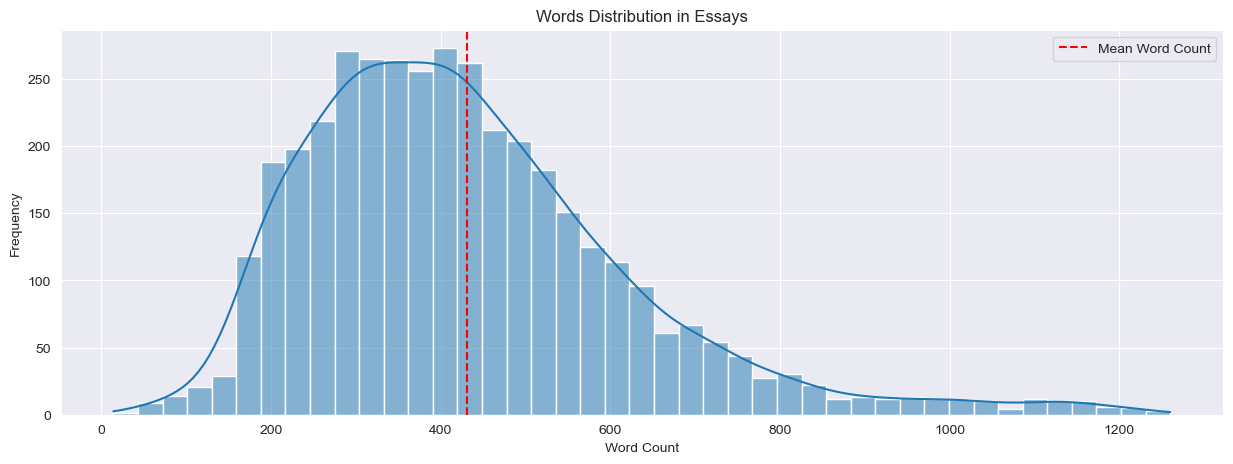

In [20]:
# Set the figure size and style
fig = plt.figure(figsize=(15, 5))
sns.set_style('darkgrid')

# Compute the word count for each essay
df_train['word_count'] = df_train.full_text.apply(lambda x: len(x.split()))

# Plot the distribution of word count
sns.histplot(data=df_train, x="word_count", kde=True)

# Plot the mean of word count
mean_word_count = df_train['word_count'].mean()
print('Mean word count in essay:', round(mean_word_count))

min_word_count = df_train['word_count'].min()
print('Min word count in essay:', round(min_word_count))

max_word_count = df_train['word_count'].max()
print('Max word count in essay:', round(max_word_count))

plt.axvline(x=mean_word_count, color='red', linestyle='--', label='Mean Word Count')
plt.legend()

# Set the title and labels
plt.title("Words Distribution in Essays")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [21]:
# initialize the spell checker
spell = SpellChecker()

# define a function to apply the spell checker to each word in a list
#def correct_spelling(word_list):
#    corrected_words = []
#    for word in word_list:
#        corrected_words.append(spell.correction(word))
#    return corrected_words

# create a pandas series with a list of words
word_series = df_train.cleaned_tokenize_text

# apply the spell checker to the series
#df_train['corrected_words'] = word_series.apply(correct_spelling)

# define a function to count the number of spelling mistakes in a list
def count_mistakes(word_list):
    mistakes = sum(1 for word in word_list if not spell.unknown(word))
    return mistakes

# apply the spell checker to the series and adding column for number of mistakes
df_train['num_mistakes'] = word_series.apply(count_mistakes)

# Just seeing the essays with mistakes
df_train[df_train['num_mistakes'] > 0]

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,lemmatized_text,sent_count,sent_len,word_count,num_mistakes
18,017802562E71,"March 12, 20019\n\nThe technology allows peopl...",3.0,2.0,3.5,2.5,2.5,2.5,"[march, 20019, technology, allows, people, com...","[march, 20019, technology, allows, people, com...",13,17.461538,227,1
42,03C9E7A15C42,I think that what\n\nAuther ralph waldo wrote ...,2.5,2.5,2.5,2.5,2.0,2.5,"[think, auther, ralph, waldo, wrote, dont, agr...","[think, auther, ralph, waldo, write, dont, agr...",9,47.222222,425,1
44,03CC97D3747E,Many schools have partner ships with companies...,4.0,4.5,4.5,4.5,4.5,4.0,"[many, schools, partner, ships, companies, all...","[many, school, partner, ship, company, allow, ...",35,19.914286,697,1
50,04491B61A791,I went to visit the manager of the Amazon comp...,2.5,2.5,3.0,2.5,2.0,2.5,"[went, visit, manager, amazon, company, saw, c...","[go, visit, manager, amazon, company, saw, com...",53,22.792453,1208,1
70,053C05D2EE43,Why Collage is Important\n\nAcorting to CNN we...,2.5,3.0,3.0,3.0,2.5,2.0,"[collage, important, acorting, cnn, weekly, 98...","[collage, important, acorting, cnn, weekly, 98...",9,24.555556,221,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,FCD5885AE01E,Generic_Name\n\n10/17/2018\n\nExamples: Some p...,2.0,2.0,2.5,2.5,2.0,2.5,"[genericname, 10172018, examples, people, list...","[genericname, 10172018, example, people, liste...",7,50.571429,354,1
3866,FE6D9B200002,The school ends at 4 o'clock and most of the s...,3.0,2.5,2.5,2.0,2.5,2.0,"[school, ends, oclock, students, arrive, home,...","[school, end, oclock, student, arrive, home, 4...",16,17.062500,273,2
3881,FEC7696871E4,"Scientist Albert Einstein said,"" Imagination i...",2.5,2.5,3.0,3.5,3.0,3.0,"[scientist, albert, einstein, said, imaginatio...","[scientist, albert, einstein, say, imagination...",35,9.600000,336,1
3882,FED42BB10805,"If you were looking for advice, would you take...",3.0,2.0,3.0,2.5,2.5,1.5,"[looking, advice, would, take, advice, one, pr...","[look, advice, would, take, advice, one, preso...",5,46.000000,230,1
